In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_df = pd.read_csv(r"D:\Guvi_Project\Personalized Learning Assistant\data\raw\ASSISTments 2009-2010 Dataset .csv")

Feature Selection based on the given document

In [3]:
df = raw_df[['studentId','skill','problemId','timeTaken','correct','hintCount','attemptCount']]
df.rename(columns={'studentId':'student_id',
                   'skill':'skill_id',
                   'problemId':'problem_id',
                   'timeTaken':'time_taken',
                   'correct':'is_correct',
                   'hintCount':'hint_count',
                   'attemptCount':'attempt_count'}, inplace=True)
df.head()

,student_id,skill_id,problem_id,time_taken,is_correct,hint_count,attempt_count
0,8,properties-of-geometric-figures,1118,49.0,0,1,1
1,8,properties-of-geometric-figures,1119,4.0,1,0,1
2,8,sum-of-interior-angles-more-than-3-sides,1120,6.0,0,0,1
3,8,sum-of-interior-angles-more-than-3-sides,1120,18.0,0,0,2
4,8,sum-of-interior-angles-more-than-3-sides,1121,2.0,1,0,1


EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942816 entries, 0 to 942815
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   student_id     942816 non-null  int64  
 1   skill_id       942816 non-null  object 
 2   problem_id     942816 non-null  int64  
 3   time_taken     942816 non-null  float64
 4   is_correct     942816 non-null  int64  
 5   hint_count     942816 non-null  int64  
 6   attempt_count  942816 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 50.4+ MB


In [5]:
df.shape

(942816, 7)

In [6]:
df.describe()

,student_id,problem_id,time_taken,is_correct,hint_count,attempt_count
count,942816.000000,942816.000000,942816.000000,942816.000000,942816.000000,942816.000000
mean,3844.844105,1899.719319,29.747869,0.372681,1.218490,2.673605
std,2250.484065,2579.212724,72.019768,0.483519,1.980665,2.929801
min,8.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1952.000000,721.000000,5.000000,0.000000,0.000000,1.000000
50%,3766.000000,1116.000000,11.000000,0.000000,0.000000,2.000000
75%,5781.000000,1419.000000,30.000000,1.000000,2.000000,3.000000
max,7783.000000,22761.000000,9999.000000,1.000000,56.000000,91.000000


In [7]:
df.nunique()

student_id       1709
skill_id          102
problem_id       3162
time_taken       9632
is_correct          2
hint_count         57
attempt_count      91
dtype: int64

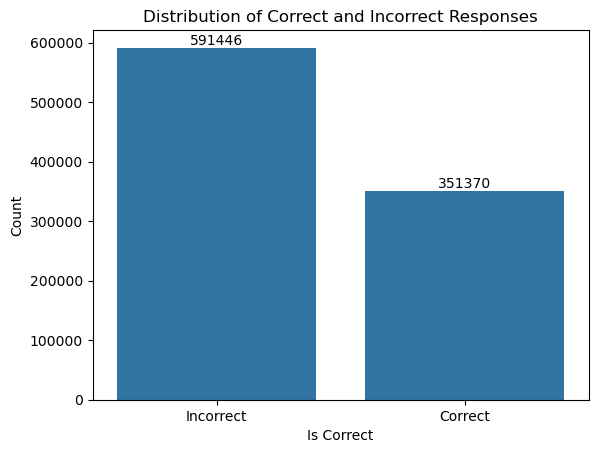

In [8]:
ax = sns.countplot(x='is_correct', data=df)
plt.title('Distribution of Correct and Incorrect Responses')
plt.xlabel('Is Correct')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])
plt.xticks([0, 1], ['Incorrect', 'Correct'])
plt.show()

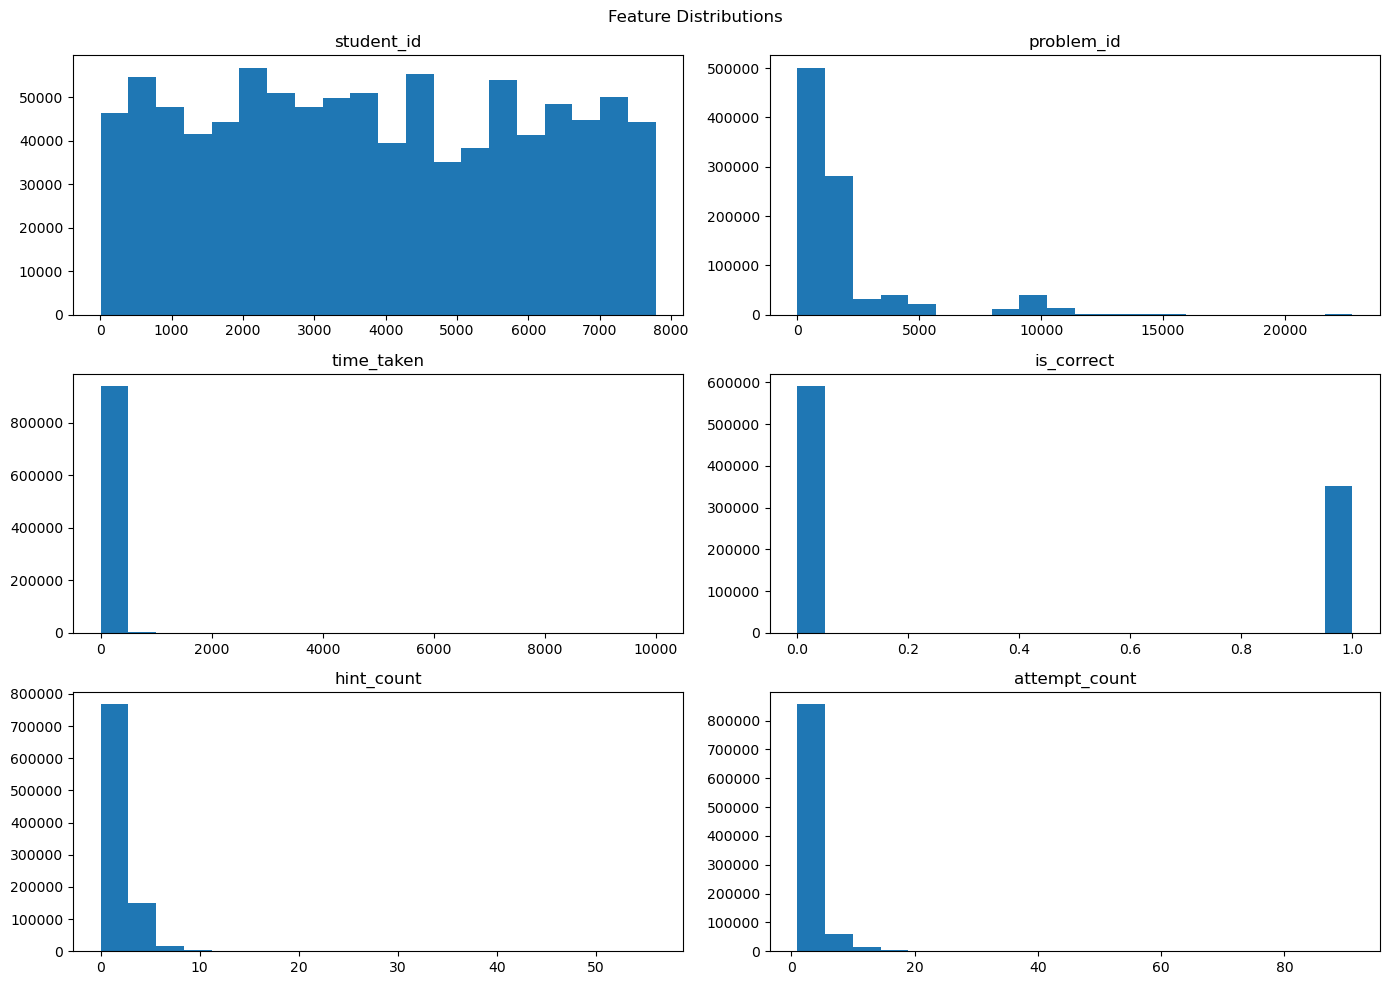

In [9]:
# Histogram for each numeric column
data = df.drop(columns = ['skill_id']) # only numerical columns
data.hist(bins=20, figsize=(14, 10), grid=False)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

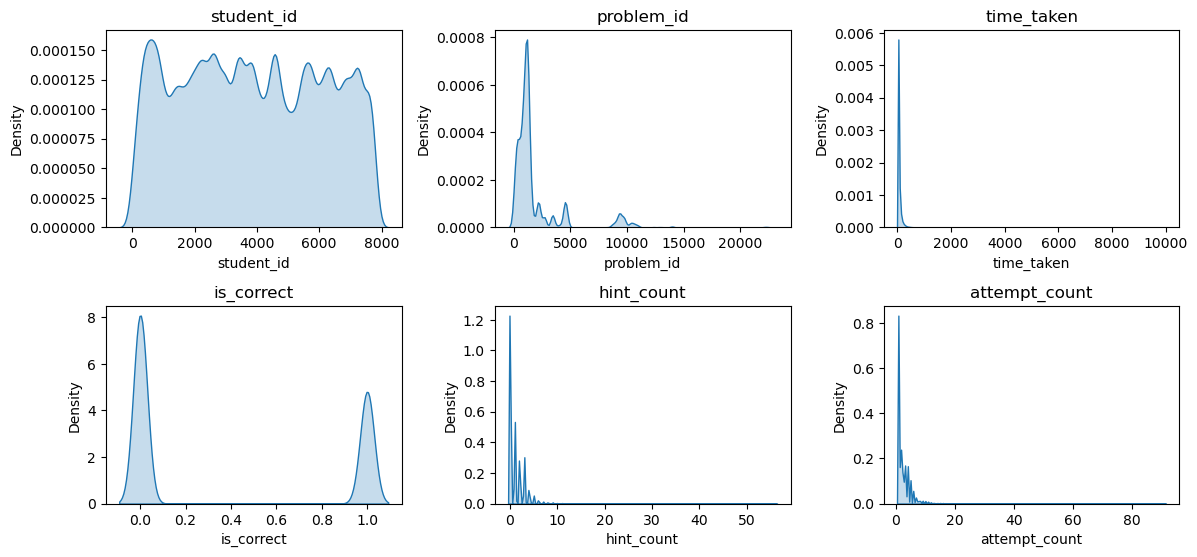

In [10]:
import warnings
warnings.filterwarnings("ignore")
# KDE plots for key features
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data[column], shade=True)
    plt.title(column)
plt.tight_layout()
plt.show()

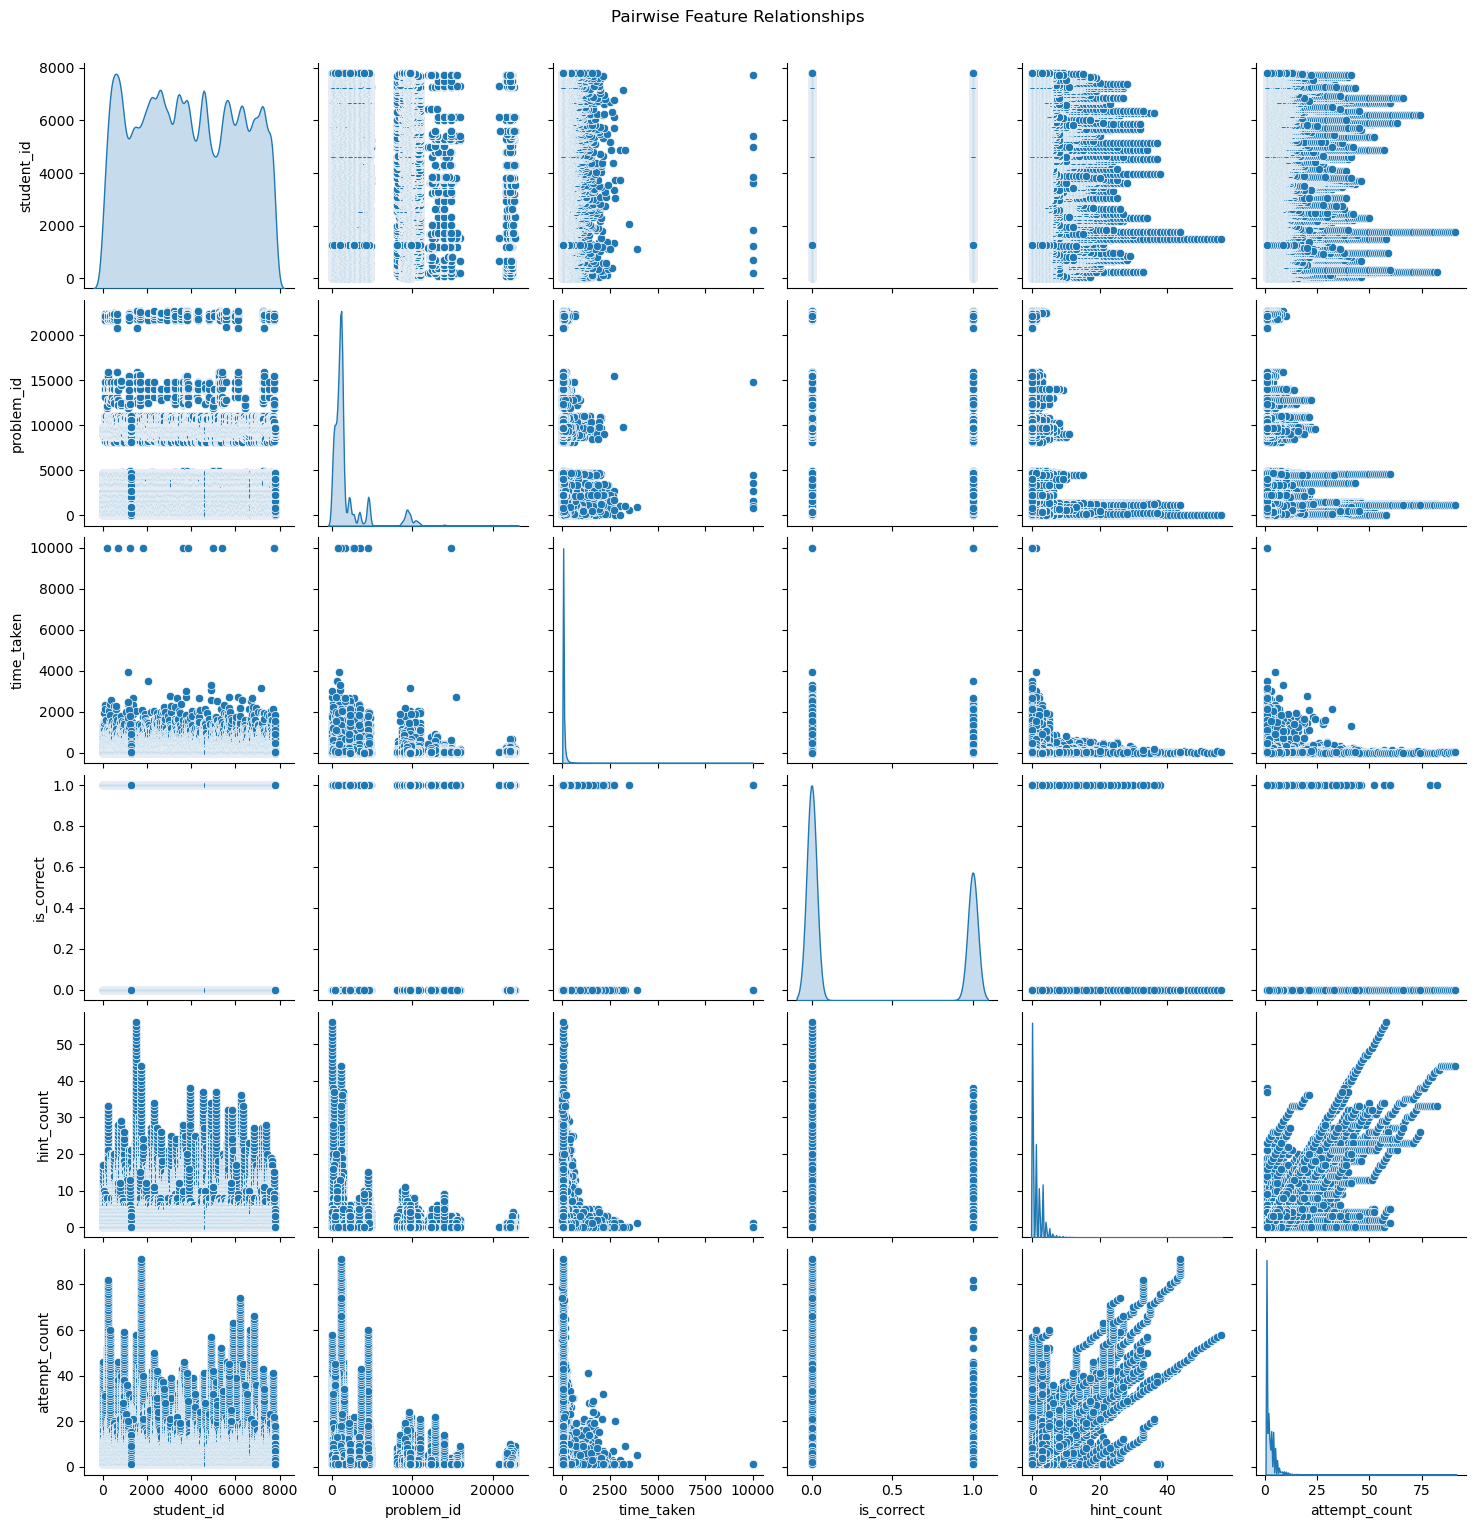

In [11]:
sns.pairplot(data, diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

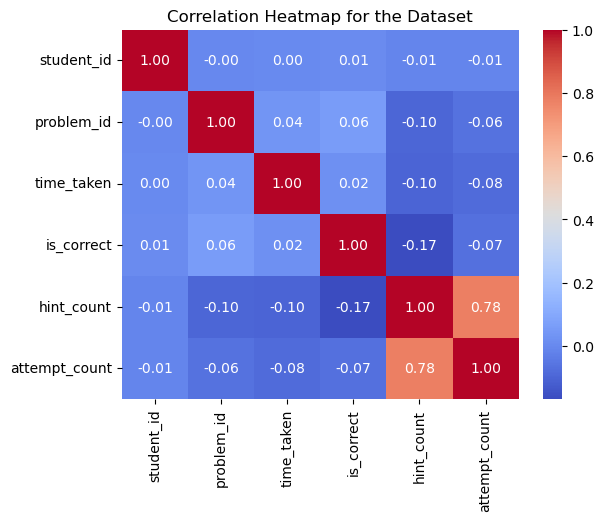

In [12]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for the Dataset')
plt.show()

Data Preprocessing

<Axes: >

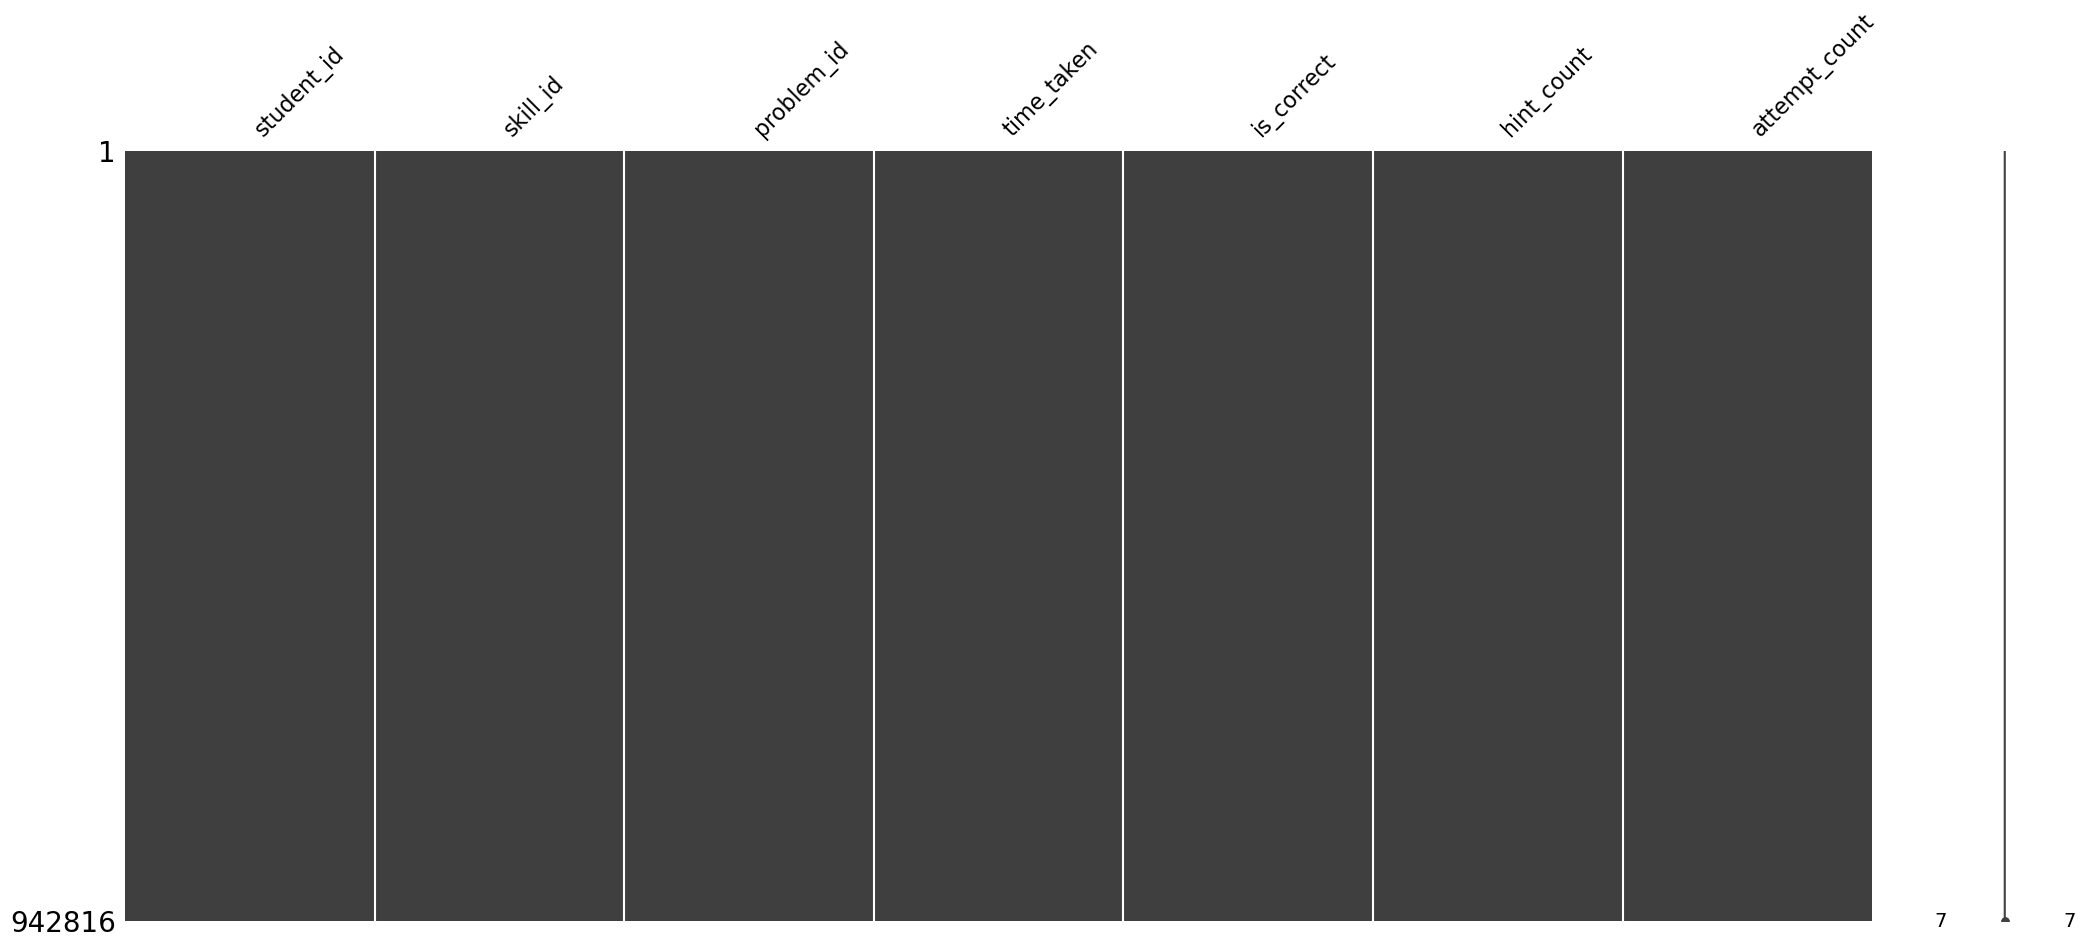

In [13]:
import missingno as msno
msno.matrix(df)

In [14]:
df.isnull().sum()

student_id       0
skill_id         0
problem_id       0
time_taken       0
is_correct       0
hint_count       0
attempt_count    0
dtype: int64

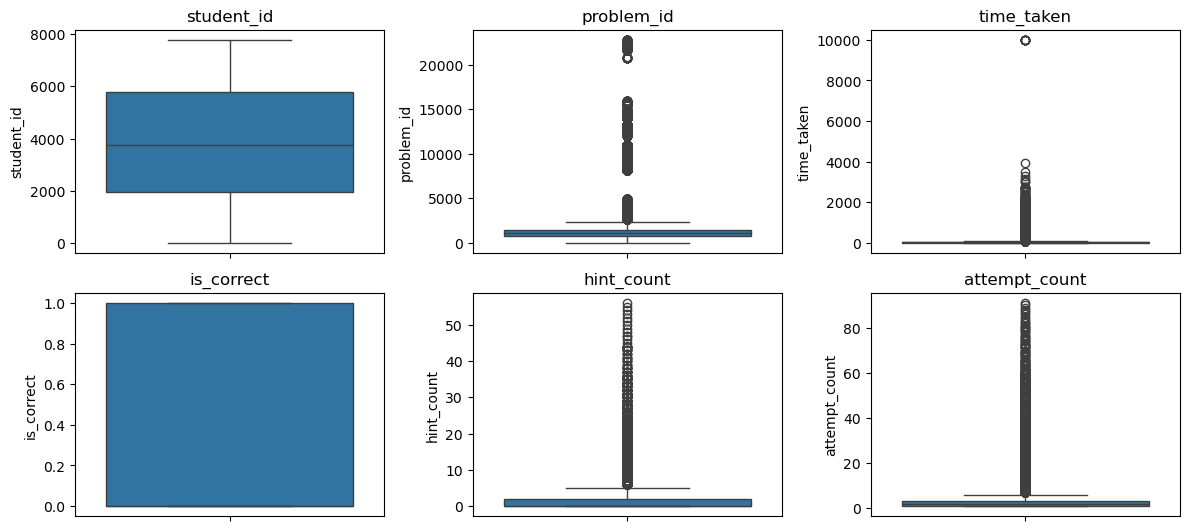

In [ ]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [16]:
from scipy.stats.mstats import winsorize
df['problem_id'] = winsorize(df['problem_id'], limits=[0.1,0.1])
df['time_taken'] = winsorize(df['time_taken'], limits= [0.1,0.1])
df['hint_count'] = winsorize(df['hint_count'], limits=[0.05,0.05])
df['attempt_count'] = winsorize(df['attempt_count'],limits=[0.05,0.05])

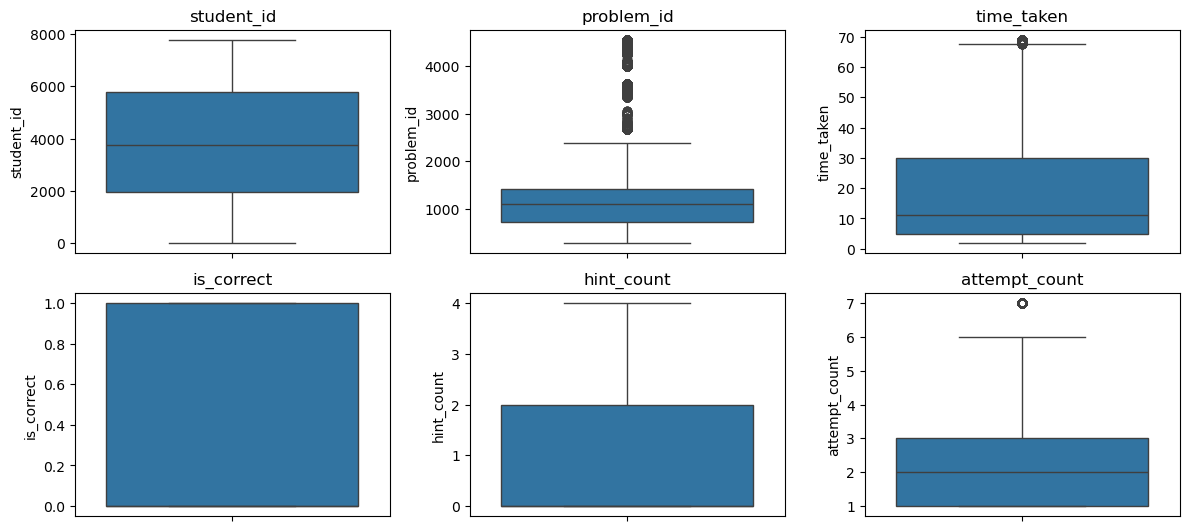

In [17]:
data = df.drop(columns=['skill_id']) # data updated here
# Boxplots for outlier detection
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [18]:
df.head()

,student_id,skill_id,problem_id,time_taken,is_correct,hint_count,attempt_count
0,8,properties-of-geometric-figures,1118,49.0,0,1,1
1,8,properties-of-geometric-figures,1119,4.0,1,0,1
2,8,sum-of-interior-angles-more-than-3-sides,1120,6.0,0,0,1
3,8,sum-of-interior-angles-more-than-3-sides,1120,18.0,0,0,2
4,8,sum-of-interior-angles-more-than-3-sides,1121,2.0,1,0,1


In [19]:
import sys
import os
sys.path.append(os.path.abspath(r'D:\Guvi_Project\Personalized Learning Assistant\src'))
from Data_Preprocessing import tokenization

df['skill_id'] = df['skill_id'].apply(tokenization)
df

,student_id,skill_id,problem_id,time_taken,is_correct,hint_count,attempt_count
0,8,[propertiesofgeometricfigur],1118,49.0,0,1,1
1,8,[propertiesofgeometricfigur],1119,4.0,1,0,1
2,8,"[sumofinterioranglesmorethan, side]",1120,6.0,0,0,1
3,8,"[sumofinterioranglesmorethan, side]",1120,18.0,0,0,2
4,8,"[sumofinterioranglesmorethan, side]",1121,2.0,1,0,1
...,...,...,...,...,...,...,...
942811,7783,[mean],2272,4.0,1,3,4
942812,7783,[mean],2273,69.0,0,0,1
942813,7783,[mean],2273,4.0,0,0,2
942814,7783,[mean],2273,3.0,1,0,3


In [20]:
from Model_Training import vectorization
data = df['skill_id'].astype(str).tolist()
df_vectors = vectorization(data, name ='TfidfVectorizer-sec1')

TfidfVectorizer-sec1 Model saved successfully.


In [21]:
df.drop(columns=['skill_id'], inplace=True)  # Drop the original skill_id column
# combining
df_combined = pd.concat([df,df_vectors], axis=1)
df_combined.head()

,student_id,problem_id,time_taken,is_correct,hint_count,attempt_count,addingdecim,addit,algebra,algebraicmanipul,...,supplementaryangl,surfaceareaandvolum,symbol,symbolizationarticul,transformationsrot,transvers,triangl,triangleinequ,unitconvers,venndiagram
0,8,1118,49.0,0,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,1119,4.0,1,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,1120,6.0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,1120,18.0,0,0,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,1121,2.0,1,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_combined.shape

(942816, 114)

In [23]:
# Save the encoded data to the output directory
df_combined.to_csv(r"D:\Guvi_Project\Personalized Learning Assistant\data\processed\predict_pass_fail.csv", index=False)

Model Selection and training

In [24]:
pro_df = df_combined.copy()

X = pro_df.drop(columns=['is_correct','student_id','problem_id'])
y = pro_df['is_correct'] # Target variable

# [LogisticRegressionCV(cv=5, random_state=42), DecisionTreeClassifier(), RandomForestClassifier(),BaggingClassifier(),GradientBoostingClassifier(), AdaBoostClassifier(), KNeighborsClassifier(),GaussianNB()]


In [25]:
from feature_engineering import normalisation, oversampling
x_sam,y_sam = oversampling(X, y)  # Oversampling to handle class imbalance

In [26]:
x_sam = normalisation(x_sam,name ='StandardScaler-sec1')  # Normalizing the oversampled features

StandardScaler-sec1 Model saved successfully.


In [27]:
from Model_Training import classification
from sklearn.linear_model import LogisticRegression
classification(LogisticRegression(penalty='l1', solver='liblinear', C=1.0), x_sam,y_sam,name='LogisticRegression-sec1')

LogisticRegression-sec1 Model saved successfully.


,Model,Accuracy,Recall Score,Precision Score,f1 Score
0,LogisticRegression,0.646562,0.713728,0.628836,0.668598


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],     # Regularization strength (lower is stronger)
    'penalty': ['l1', 'l2'],     # Type of regularization
    'solver': ['liblinear'],     # liblinear supports L1
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=2,scoring='accuracy')


In [29]:
classification(grid, x_sam,y_sam,name='GridSearchCV-sec1')

GridSearchCV-sec1 Model saved successfully.


,Model,Accuracy,Recall Score,Precision Score,f1 Score
0,GridSearchCV,0.64704,0.717815,0.62844,0.670161


In [30]:
from sklearn.tree import DecisionTreeClassifier
classification(DecisionTreeClassifier(), x_sam,y_sam,name='DecisionTreeClassifier-sec1')

DecisionTreeClassifier-sec1 Model saved successfully.


,Model,Accuracy,Recall Score,Precision Score,f1 Score
0,DecisionTreeClassifier,0.731134,0.857638,0.684186,0.761156


In [31]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
classification(RandomForestClassifier(), x_sam,y_sam,name='RandomForestClassifier-sec1')

RandomForestClassifier-sec1 Model saved successfully.


,Model,Accuracy,Recall Score,Precision Score,f1 Score
0,RandomForestClassifier,0.732605,0.870306,0.682108,0.764799


In [32]:
classification(GradientBoostingClassifier(), x_sam,y_sam, name ='GradientBoostingClassifier-sec1')

GradientBoostingClassifier-sec1 Model saved successfully.


,Model,Accuracy,Recall Score,Precision Score,f1 Score
0,GradientBoostingClassifier,0.715042,0.91154,0.654122,0.761669
